<a href="https://colab.research.google.com/github/atropass/EPAM_DS/blob/main/Module1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

# Part 1: EDA (30% max)

# **1.1 Univariate Analysis**

In [5]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
nulls_in_numerical_cols = data[numerical_cols].isnull().any()
nulls_in_numerical_cols

age               False
duration          False
campaign          False
pdays             False
previous          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool

In [6]:
numerical_desc = data[numerical_cols].describe()

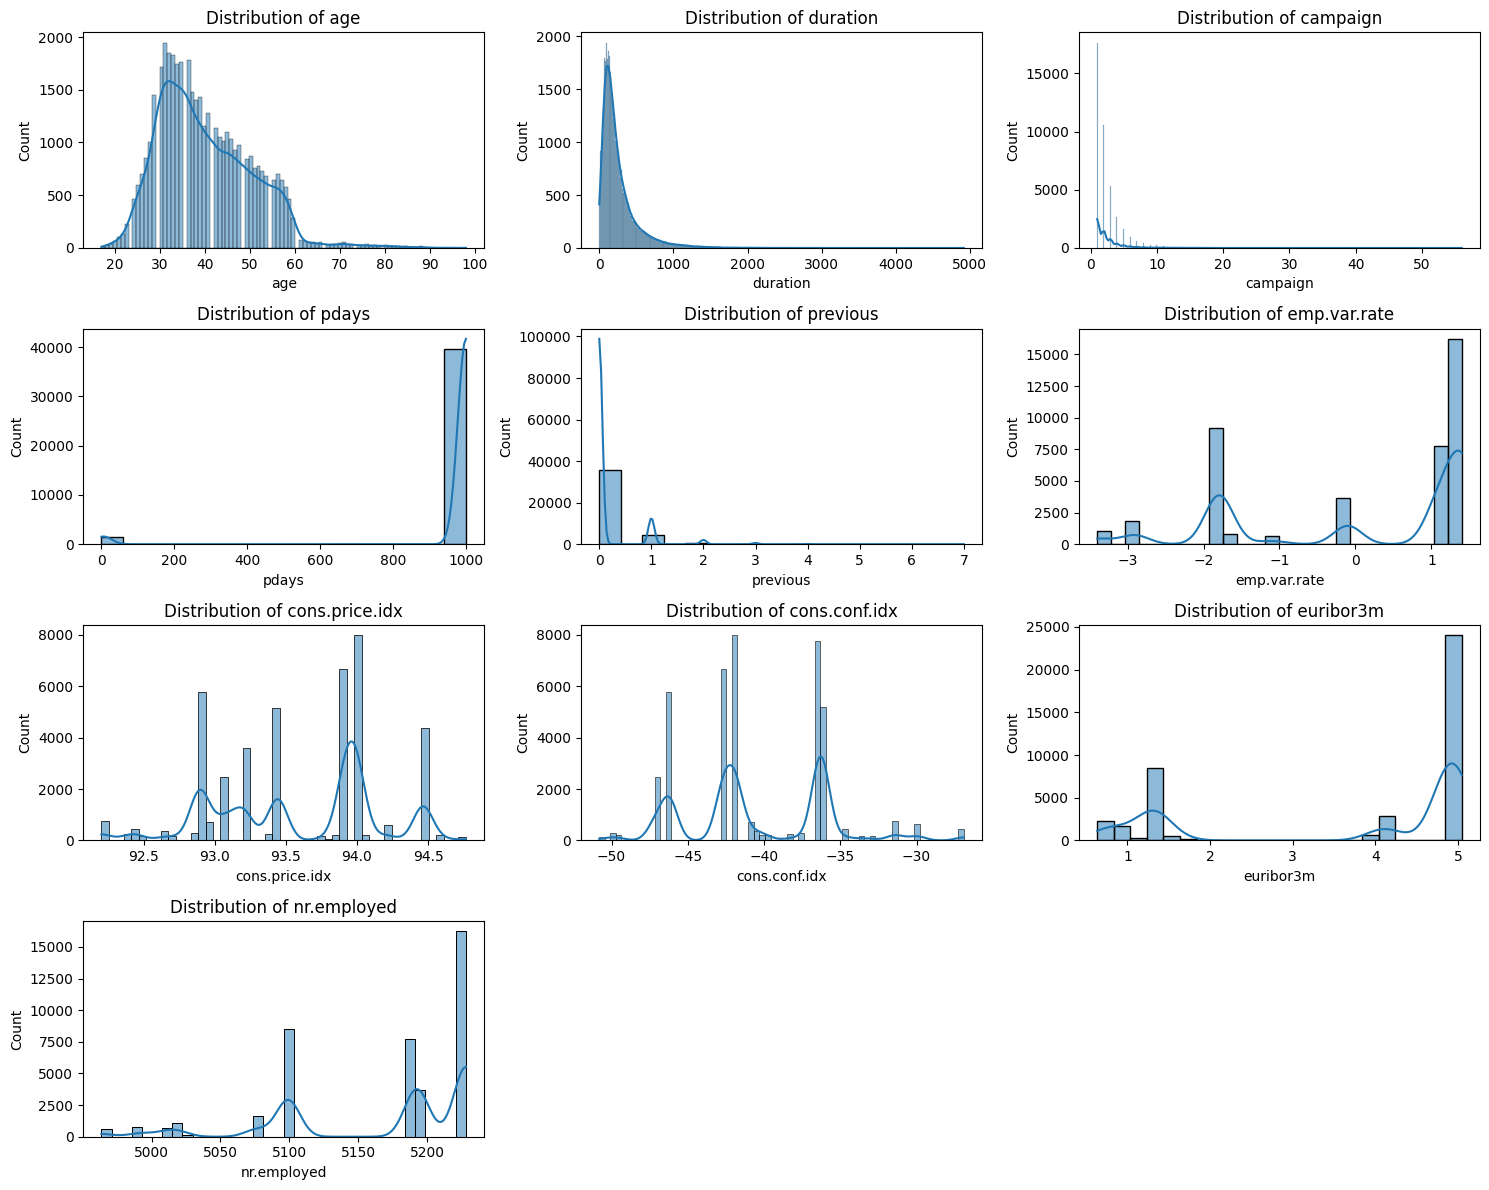

(               age      duration      campaign         pdays      previous  \
 count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
 mean      40.02406    258.285010      2.567593    962.475454      0.172963   
 std       10.42125    259.279249      2.770014    186.910907      0.494901   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
 mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
 std        1.570960        0.578840     

In [7]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

numerical_desc, plt.show()

```Descriptive statistics:```

1)Age: from 17 to 98, with avg 40

2)Duration: from 0 to 4918, with right skew which means most calls relatively short

3)Campaign: most clients contacted 1-3 times, we have some outliers contacted many more times.

4)Pdays: the majority of clients were not previously contacted (999 days), most of clients first-time contacts. Also it might be quasi constant.

5)Previous: Most clients were not contacted before the current campaign.

6)Socio-economic indicators (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed): These show varying distributions, need to understand them


```Anomalies and Patterns:```

Duration: A significant number of calls have a very short even 0

Campaign: Outliers with an unusually high number of contacts.

Pdays: Might be quasi constant

Previous: The majority have a value of 0, with a few exceptions.


```Observation on charts:```

Features like 'age', 'duration', and 'campaign' are right-skewed AND
'pdays' needs special attention during analysis

**Univariate Analysis: Categorical Features**

In [8]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome', 'y']
nulls_in_categorical_cols = data[categorical_cols].isnull().any()
nulls_in_categorical_cols

job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
poutcome       False
y              False
dtype: bool

In [9]:
categorical_desc = data[categorical_cols].describe()
unknown_counts = data[categorical_cols].apply(lambda x: (x == 'unknown').sum())
unknown_counts

job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

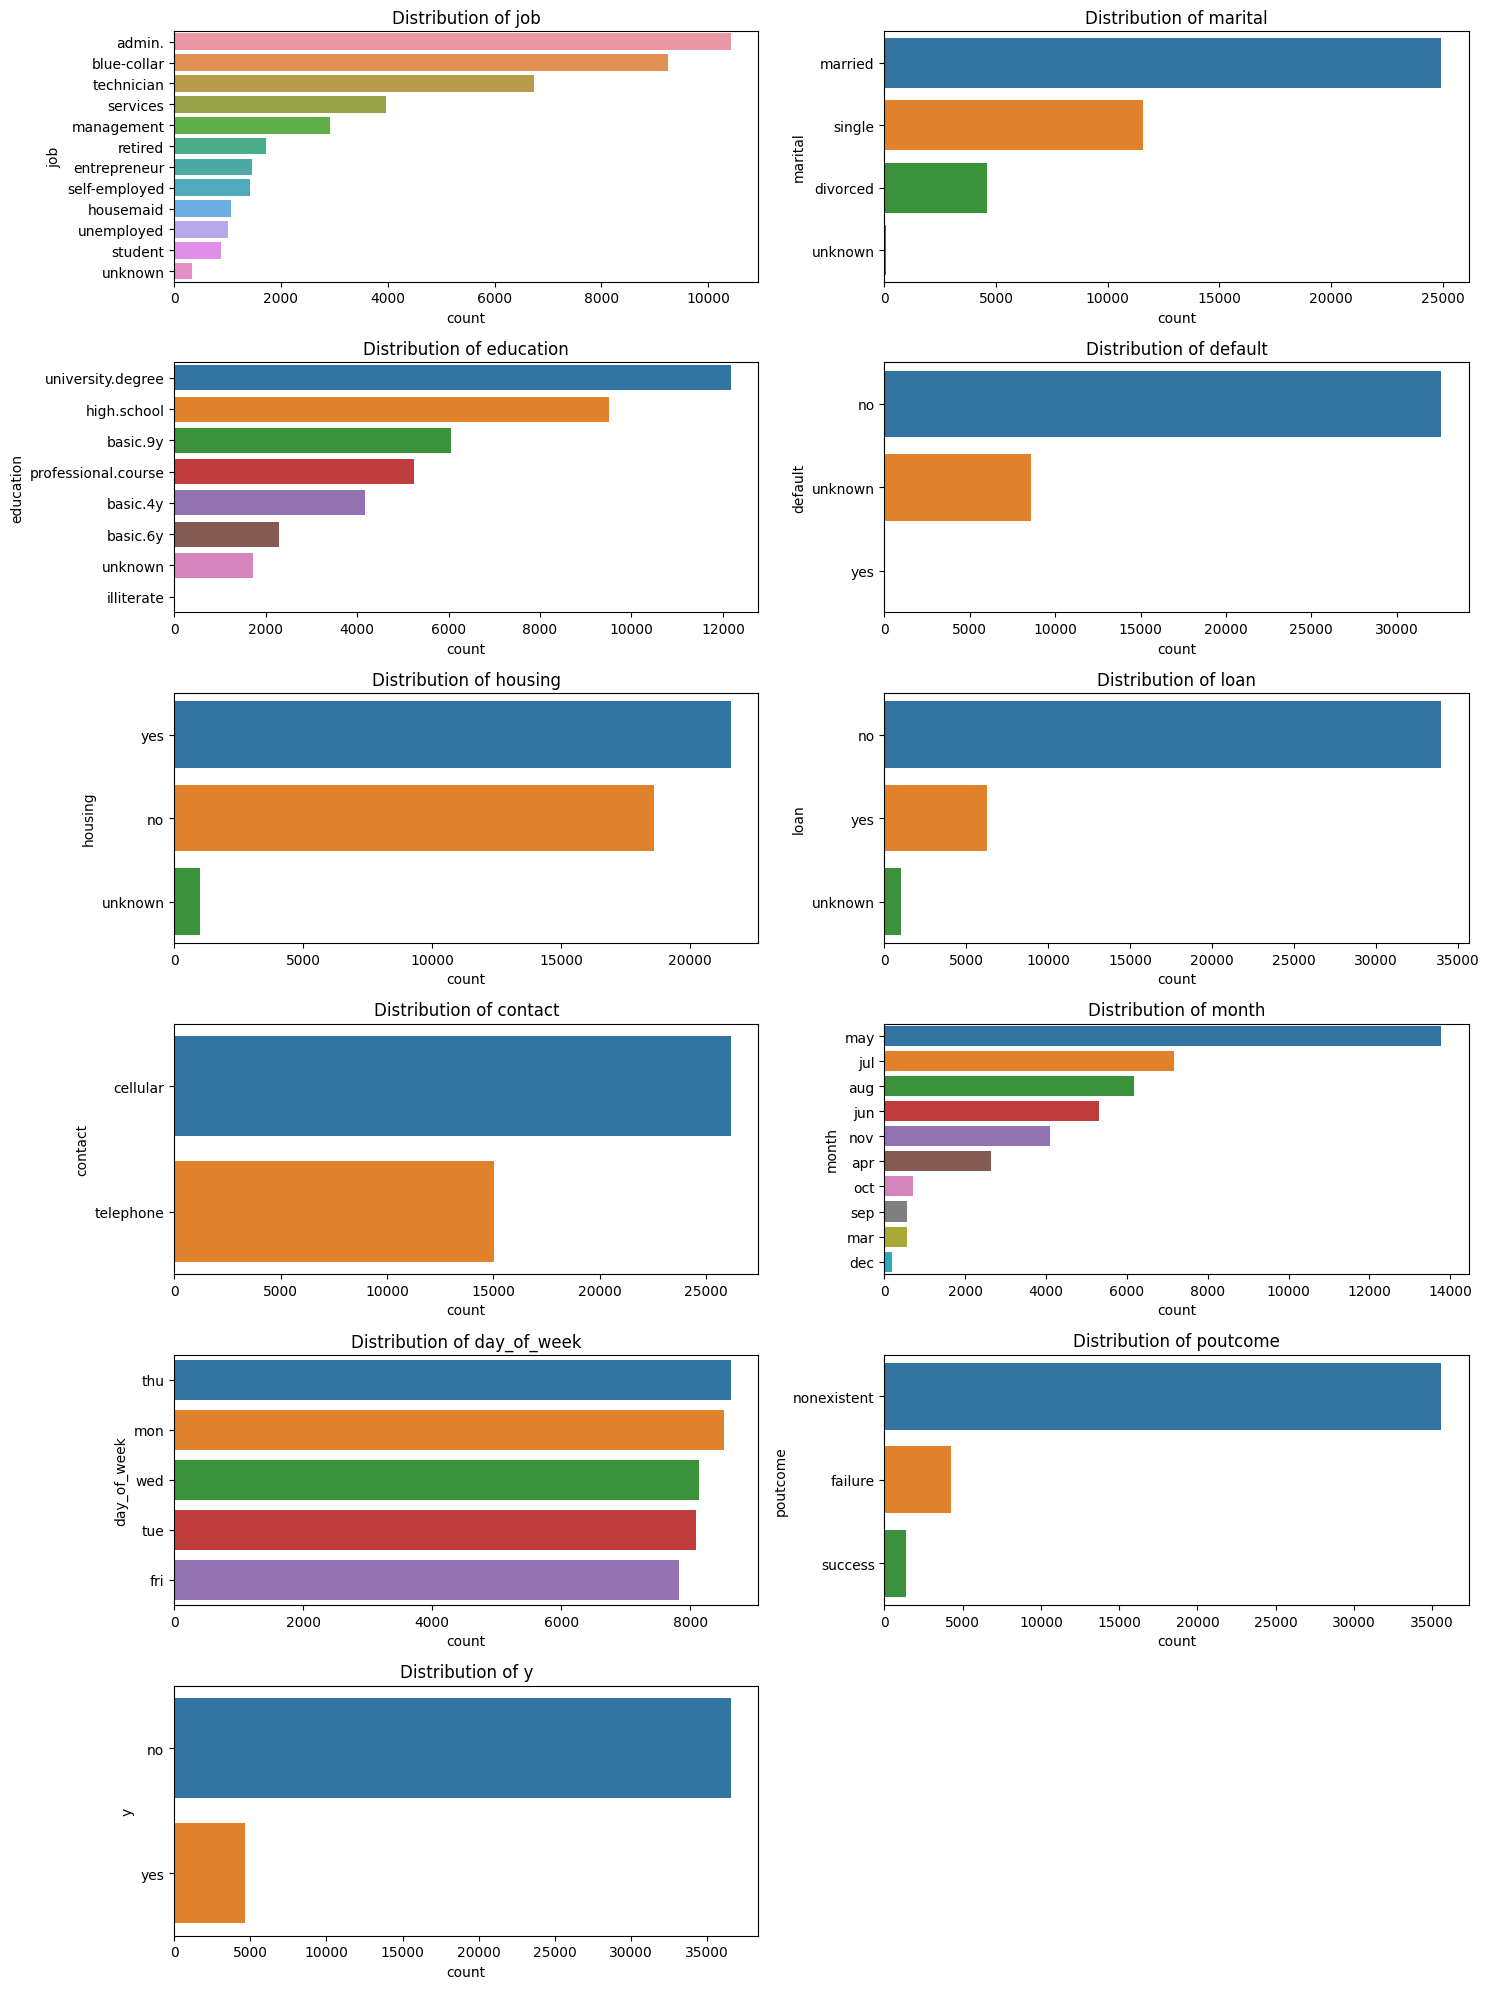

In [10]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

```Descriptive Statistics:```

Job: Most is 'admin.', but distribution is fairly spreaded

Marital: Majority are married

Education: 'University.degree' is the most common.
Default, Housing, Loan: Most entr. are 'no', but we have significant number of 'unknown', especially in 'default'

Contact: The most is cellular

Month, Day_of_week: May is the most common month

Poutcome: The majority ar 'nonexistent'

Target Variable (y): Majority are 'no'

```Missing Values ('unknown'):```

Job: 330 unknown values.

Marital: 80 unknown values.

Education: 1731 unknown values.

Default: 8597 unknown values.

Housing and Loan: Each has 990 unknown values.

```Observation on charts:```

Features like 'default', 'housing', and 'loan' have a noteworthy number of 'unknown' and needs special attention during analysis

# **1.2 Multivariate Analysis**

1. Correlation Matrix for Numerical Features

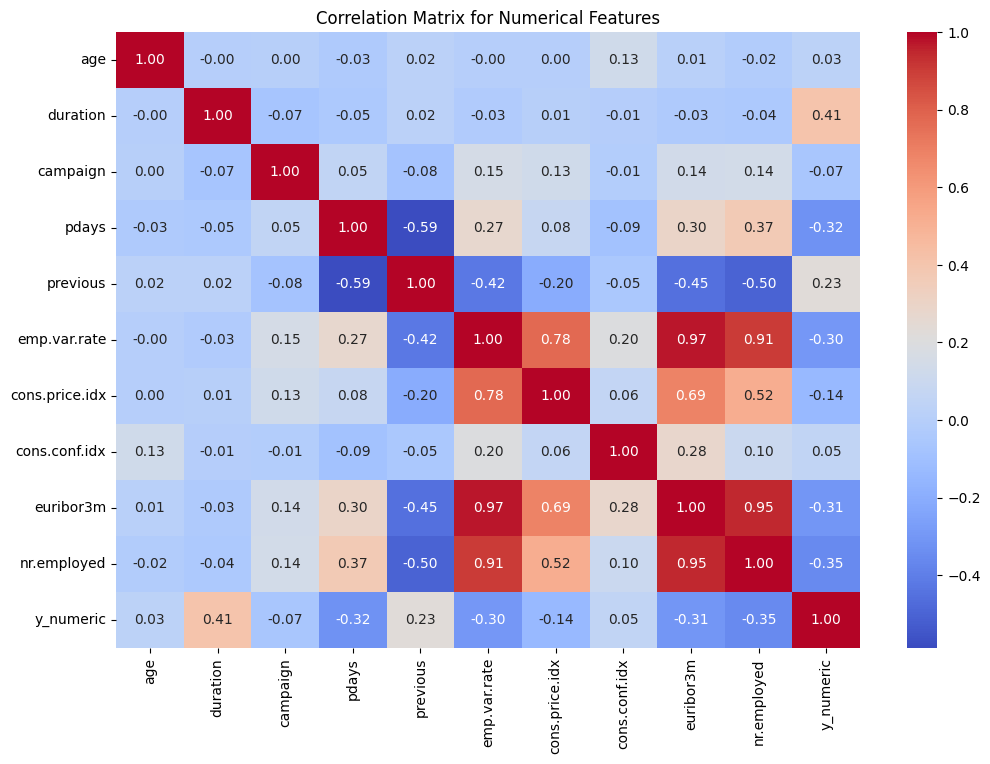

In [11]:
data['y_numeric'] = data['y'].map({'yes': 1, 'no': 0})
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

```High Correlations:```

emp.var.rate, euribor3m, and nr.employed show strong positive correlations, they are related to economic conditions, tend to move together

pdays and previous show a moderate negative correlation, the more time has passed since last contact, the fewer contacts were made previously

```Low or No Correlation:```

age, duration, and campaign have low correlations, so they provide unique information

```Low Correlations with Target Variable:``` except 'duration', highly affects the output target

2. Categorical vs Numerical Features

For a detailed multivariate analysis focusing on key feature combinations:

**Age and Marital Status** Why It's Key:
It shows life stages and financial decsisions. Marital status combined with age can indicate different financial needs and priorities

**Job and Education** Why It's Key:
Professional background and educational attainment, how education level influences career choices and subsequent financial decisions

**Housing and Personal Loan Status (Housing vs Loan)** Why It's Key:    Indicates financial commitments and stability.Owning a house or having loans can significantly impact a person's willingness to invest in term deposits.

**Economic Indicators and Job Category** Why It's Key:
Different job categories may react differently to economic changes. Understanding this can help tailor marketing strategies to different professional groups

**Duration of Contact and Month of Contact**
Why It's Key:
Provides insights into the effectiveness of marketing campaigns. Seasonal variations in responses can be critical for planning marketing strategies.

```Age and Marital Status:```

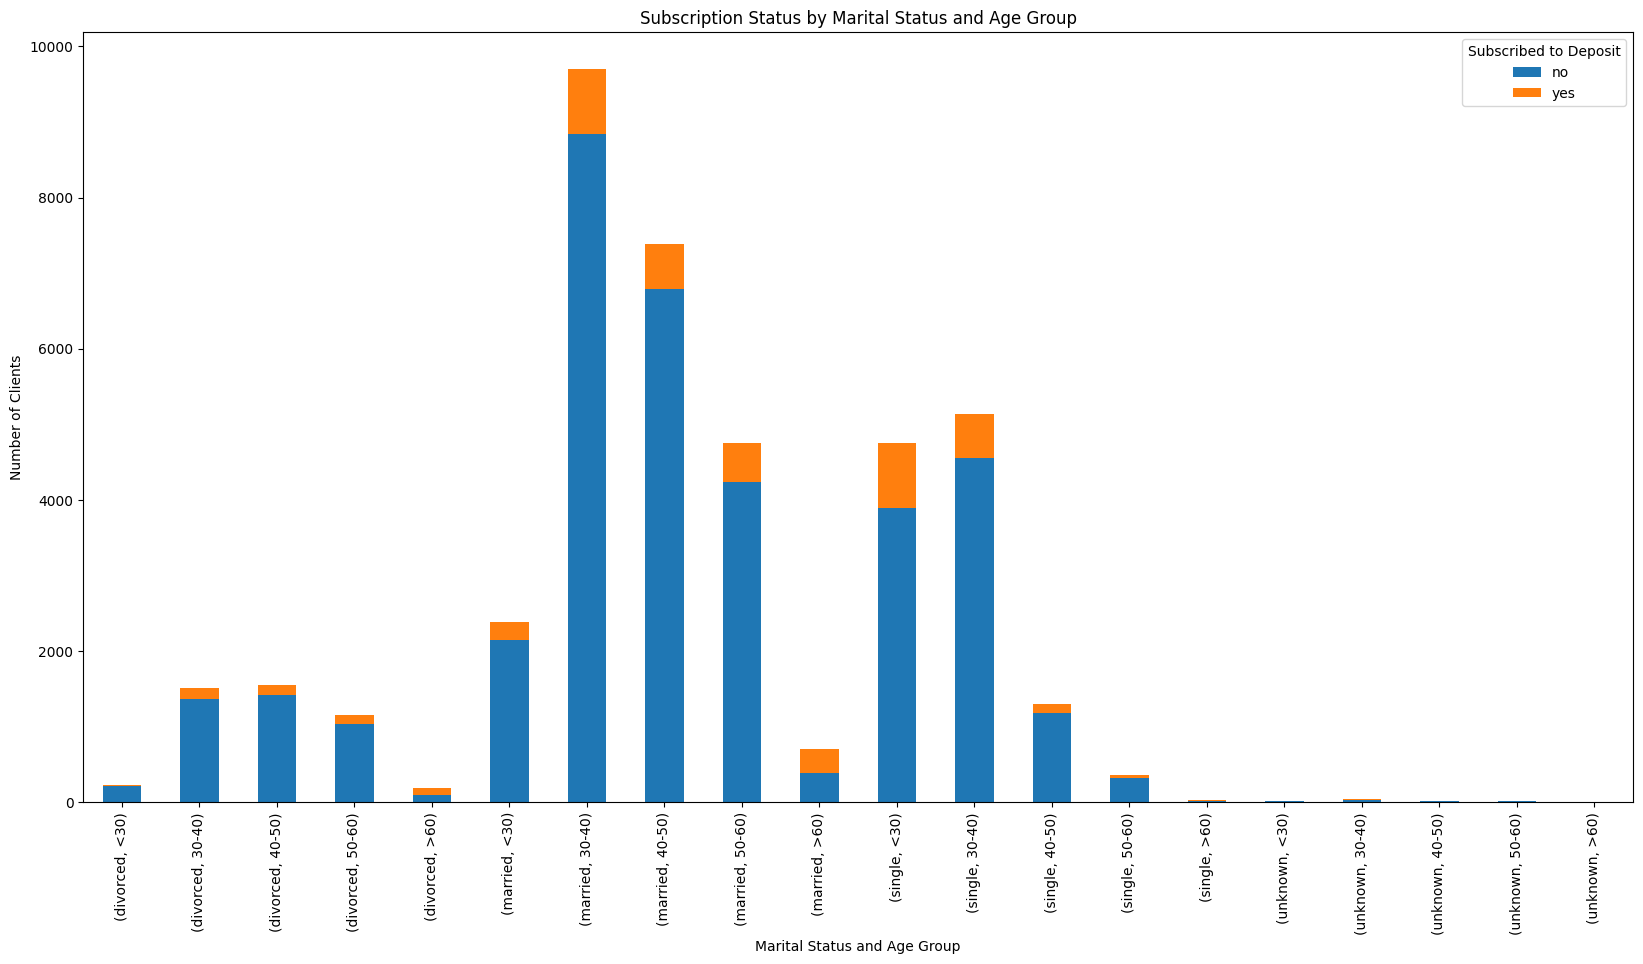

y                     no  yes
marital  age_group           
divorced <30         211   18
         30-40      1370  135
         40-50      1422  126
         50-60      1038  112
         >60          95   85
married  <30        2148  242
         30-40      8838  867
         40-50      6795  588
         50-60      4236  517
         >60         379  318
single   <30        3890  861
         30-40      4548  591
         40-50      1175  120
         50-60       314   38
         >60          21   10
unknown  <30          10    3
         30-40        32    4
         40-50        11    3
         50-60        14    1
         >60           1    1

In [12]:
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
marital_age_vs_target = pd.crosstab(index=[data['marital'], data['age_group']], columns=data['y'])

marital_age_vs_target_plot = marital_age_vs_target.plot(kind='bar', figsize=(20, 10), stacked=True)
plt.title('Subscription Status by Marital Status and Age Group')
plt.xlabel('Marital Status and Age Group')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)
plt.legend(title='Subscribed to Deposit')
plt.show()

marital_age_vs_target

Single and Younger Age Groups: The 'single' category shows a high number of subscriptions among the younger age group (<30), suggesting that younger, unmarried individuals are a key demographic for term deposit subscriptions.

Married Across Age Groups: The 'married' category dominates in terms of total numbers across most age groups, particularly in the 30-50 age range. The subscription rate in this group is significant, especially in the 50-60 age group.

Divorced/Widowed in Older Age Groups: In the 'divorced' or 'widowed' category, there's a notable increase in subscriptions among older age groups (>50), which might indicate different financial needs or planning considerations in these life stages.

Unknown Marital Status: This category has low numbers but shows some level of subscription across different age groups.

```Job and Education:```

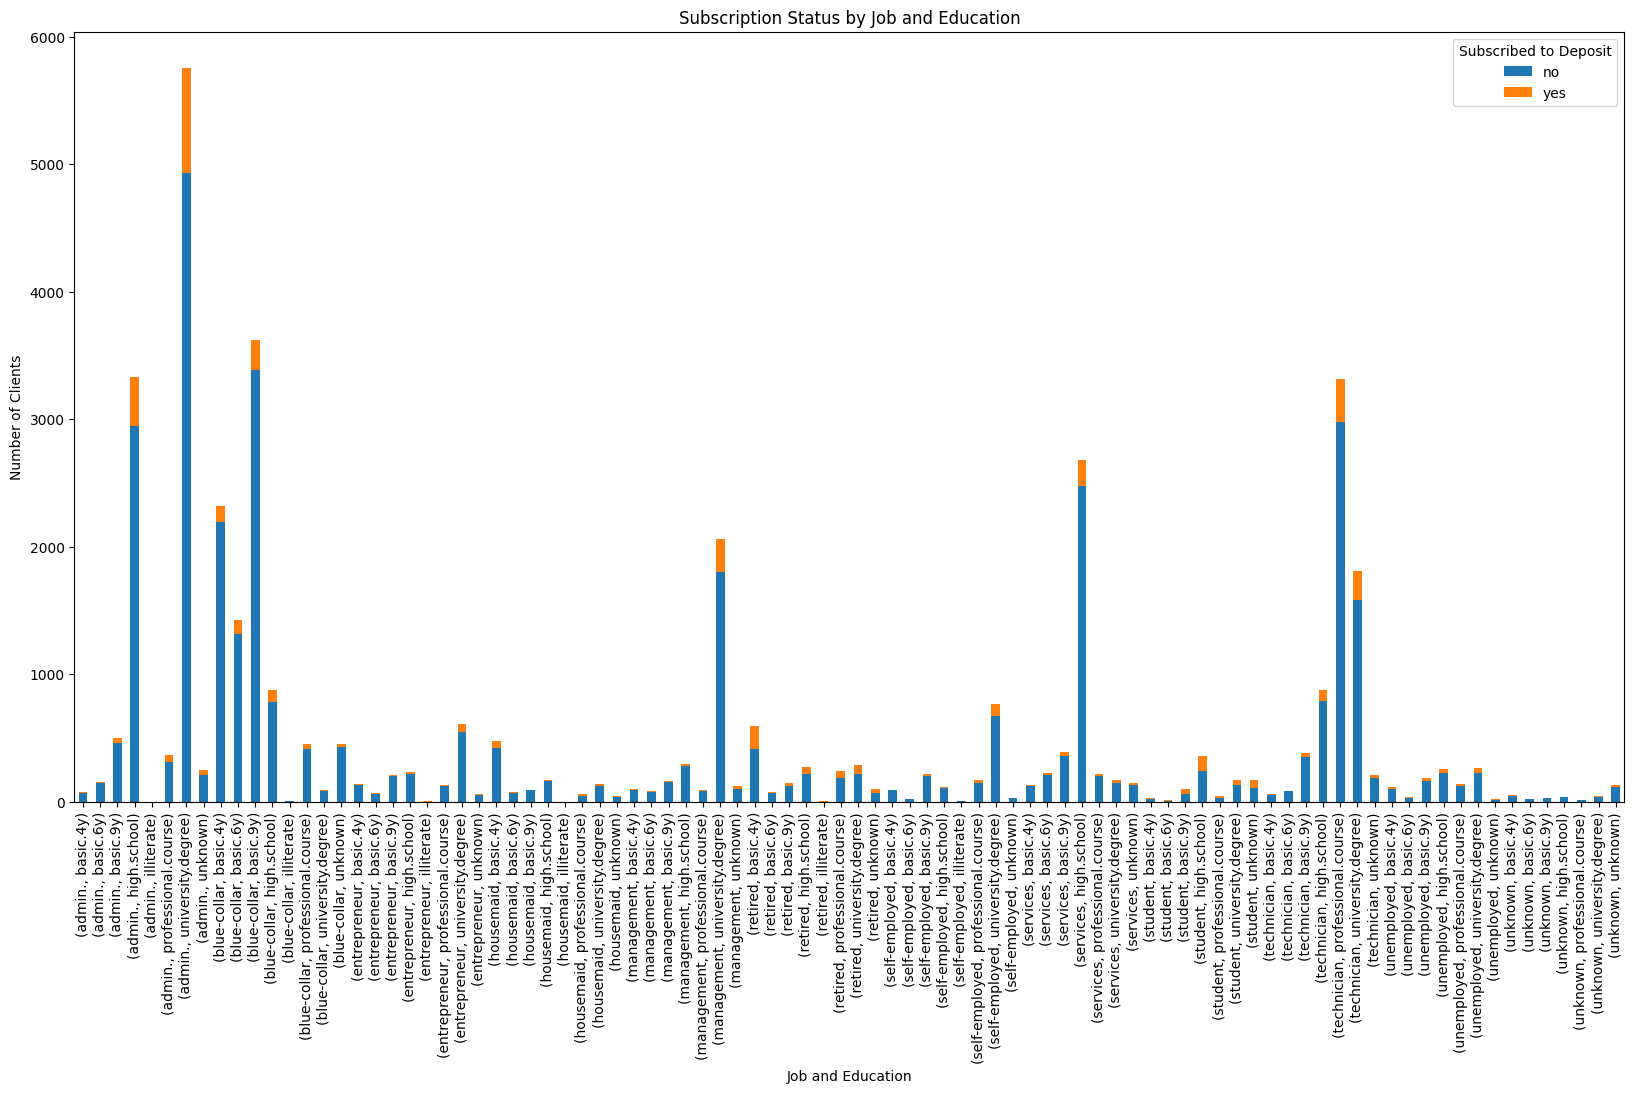

y                              no  yes
job     education                     
admin.  basic.4y               67   10
        basic.6y              143    8
        basic.9y              457   42
        high.school          2947  382
        illiterate              1    0
...                           ...  ...
unknown basic.9y               30    1
        high.school            35    2
        professional.course    11    1
        university.degree      34   11
        unknown               114   17

[90 rows x 2 columns]

In [13]:
job_education_vs_target = pd.crosstab(index=[data['job'], data['education']], columns=data['y'])

job_education_vs_target_plot = job_education_vs_target.plot(kind='bar', figsize=(20, 10), stacked=True)
plt.title('Subscription Status by Job and Education')
plt.xlabel('Job and Education')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)
plt.legend(title='Subscribed to Deposit')
plt.show()

job_education_vs_target

High School and University Degree: 'high school' or 'university degree' education show a significant number of subscriptions. We can see in in job categories like 'admin.', 'technician', and 'services'.

Varied Educational Backgrounds in Different Jobs: Different job categories have varied distributions of education levels.

Basic Education Levels in Certain Jobs: Jobs like 'blue-collar' and 'services' have a higher count of individuals with basic education levels (e.g., basic.9y, basic.4y). The subscription rate in these groups is lower compared to more educated segments.

Unknown Education Levels: There are noticeable numbers of individuals with 'unknown' education levels across various job categories, and this group shows some level of subscription as well.

```Housing and Personal Loan Status (Housing vs Loan)```

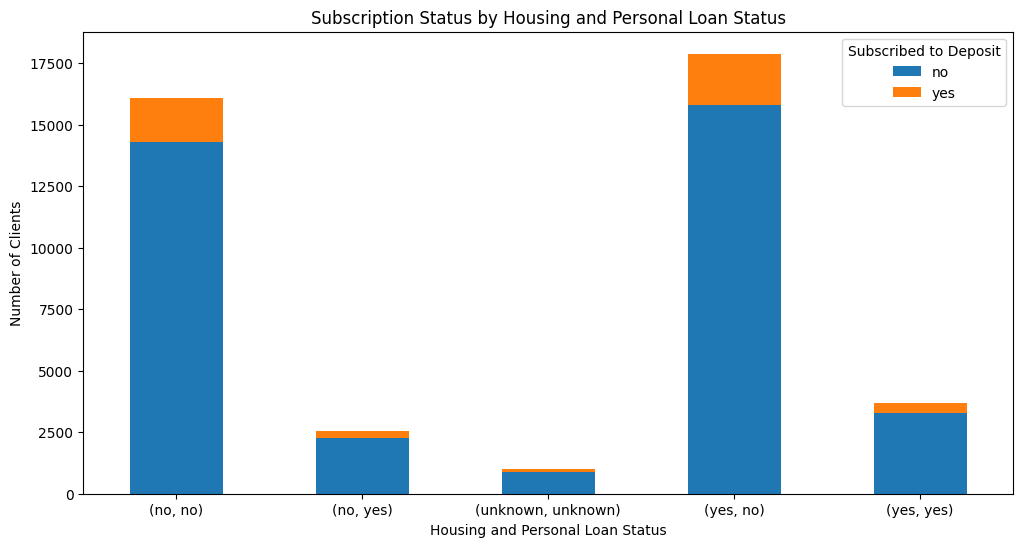

y                   no   yes
housing loan                
no      no       14313  1752
        yes       2283   274
unknown unknown    883   107
yes     no       15787  2098
        yes       3282   409

In [16]:
housing_loan_vs_target = pd.crosstab(index=[data['housing'], data['loan']], columns=data['y'])

housing_loan_vs_target_plot = housing_loan_vs_target.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Subscription Status by Housing and Personal Loan Status')
plt.xlabel('Housing and Personal Loan Status')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.legend(title='Subscribed to Deposit')
plt.show()

housing_loan_vs_target

No Loans (Housing or Personal): The group with no housing and no personal loans (no, no) has the highest number of clients, and within this group, there is a visible proportion of clients who have subscribed to a term deposit.

Housing Loan Only (Yes, No): Clients with only a housing loan constitute the second-largest group.

Both Housing and Personal Loans (Yes, Yes): Clients with both housing and personal loans are fewer in number compared to the other groups, but there is still a considerable subscription rate.

Personal Loan Only (No, Yes): Clients with only a personal loan are the smallest group, with a lower subscription rate compared to the other groups. This might be due to the higher interest rates generally associated with personal loans, which could limit disposable income for investments.

Unknown Loan Status (Unknown, Unknown): There is a small group of clients with unknown loan status, with some clients from this group subscribing to term deposits.

```Economic Indicators and Job Category```

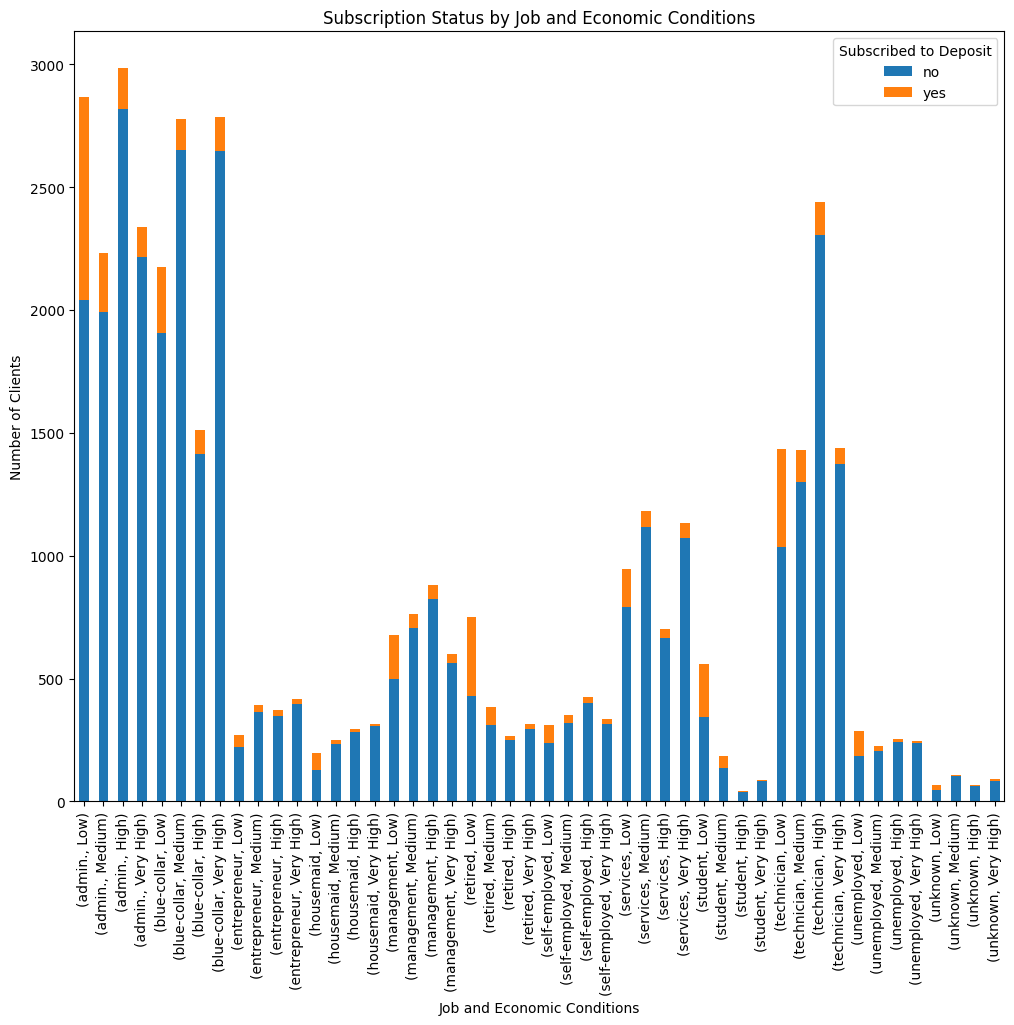

y                                       no  yes
job           economic_condition_bin           
admin.        Low                     2043  823
              Medium                  1994  237
              High                    2817  168
              Very High               2216  124
blue-collar   Low                     1905  270
              Medium                  2651  127
              High                    1414   99
              Very High               2646  142
entrepreneur  Low                      223   49
              Medium                   365   28
              High                     348   25
              Very High                396   22
housemaid     Low                      129   68
              Medium                   235   17
              High                     281   16
              Very High                309    5
management    Low                      500  177
              Medium                   707   57
              High                     825   58
              Very High                564   36
retired       Low                      429  322
              Medium                   313   72
              High                     250   18
              Very High                294   22
self-employed Low                      238   72
              Medium                   319   32
              High                     400   25
              Very High                315   20
services      Low                      791  155
              Medium                  1117   67
              High                     664   40
              Very High               1074   61
student       Low                      343  216
              Medium                   138   49
              High                      37    4
              Very High                 82    6
technician    Low                     1034  401
              Medium                  1301  129
              High                    2306  134
              Very High               1372   66
unemployed    Low                      187  101
              Medium                   204   23
              High                     243   10
              Very High                236   10
unknown       Low                       45   22
              Medium                   103    4
              High                      61    5
              Very High                 84    6

In [19]:
data['economic_condition'] = data[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']].mean(axis=1)
# Binning the economic condition for easier analysis
data['economic_condition_bin'] = pd.qcut(data['economic_condition'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

job_economic_vs_target = pd.crosstab(index=[data['job'], data['economic_condition_bin']], columns=data['y'])

job_economic_vs_target_plot = job_economic_vs_target.plot(kind='bar', figsize=(12, 10), stacked=True)
plt.title('Subscription Status by Job and Economic Conditions')
plt.xlabel('Job and Economic Conditions')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)
plt.legend(title='Subscribed to Deposit')
plt.show()

job_economic_vs_target

Admin Category: It's evident that the admin job category has a large number of clients across all economic conditions. However, the proportion of clients who subscribed to a term deposit ('yes') is visibly larger in the 'Very High' economic condition bin compared to other bins.

Blue-Collar Workers: This group has a significant presence in the dataset, particularly in the 'Low' and 'Medium' economic condition bins. The subscription rates are relatively lower compared to the admin category, indicating that economic conditions may have a different impact on blue-collar workers' decisions to subscribe to a term deposit.

Retired Individuals: There is a noticeable amount of subscriptions in the 'Very High' economic condition bin. This could suggest that retired individuals in more stable or prosperous economic conditions are more likely to invest in term deposits.

Technicians: Similar to the admin category, technicians are well-represented across all economic conditions. There's a marked increase in the number of subscriptions in the 'High' and 'Very High' economic conditions.

Management: This category shows a steady number of subscriptions across economic conditions, but with a slight increase in the 'High' economic condition bin.

Students: The student group shows a higher tendency to subscribe in the 'Very High' economic condition bin. This might be indicative of students' financial behavior being influenced by broader economic stability.

```Duration of Contact and Month of Contact```

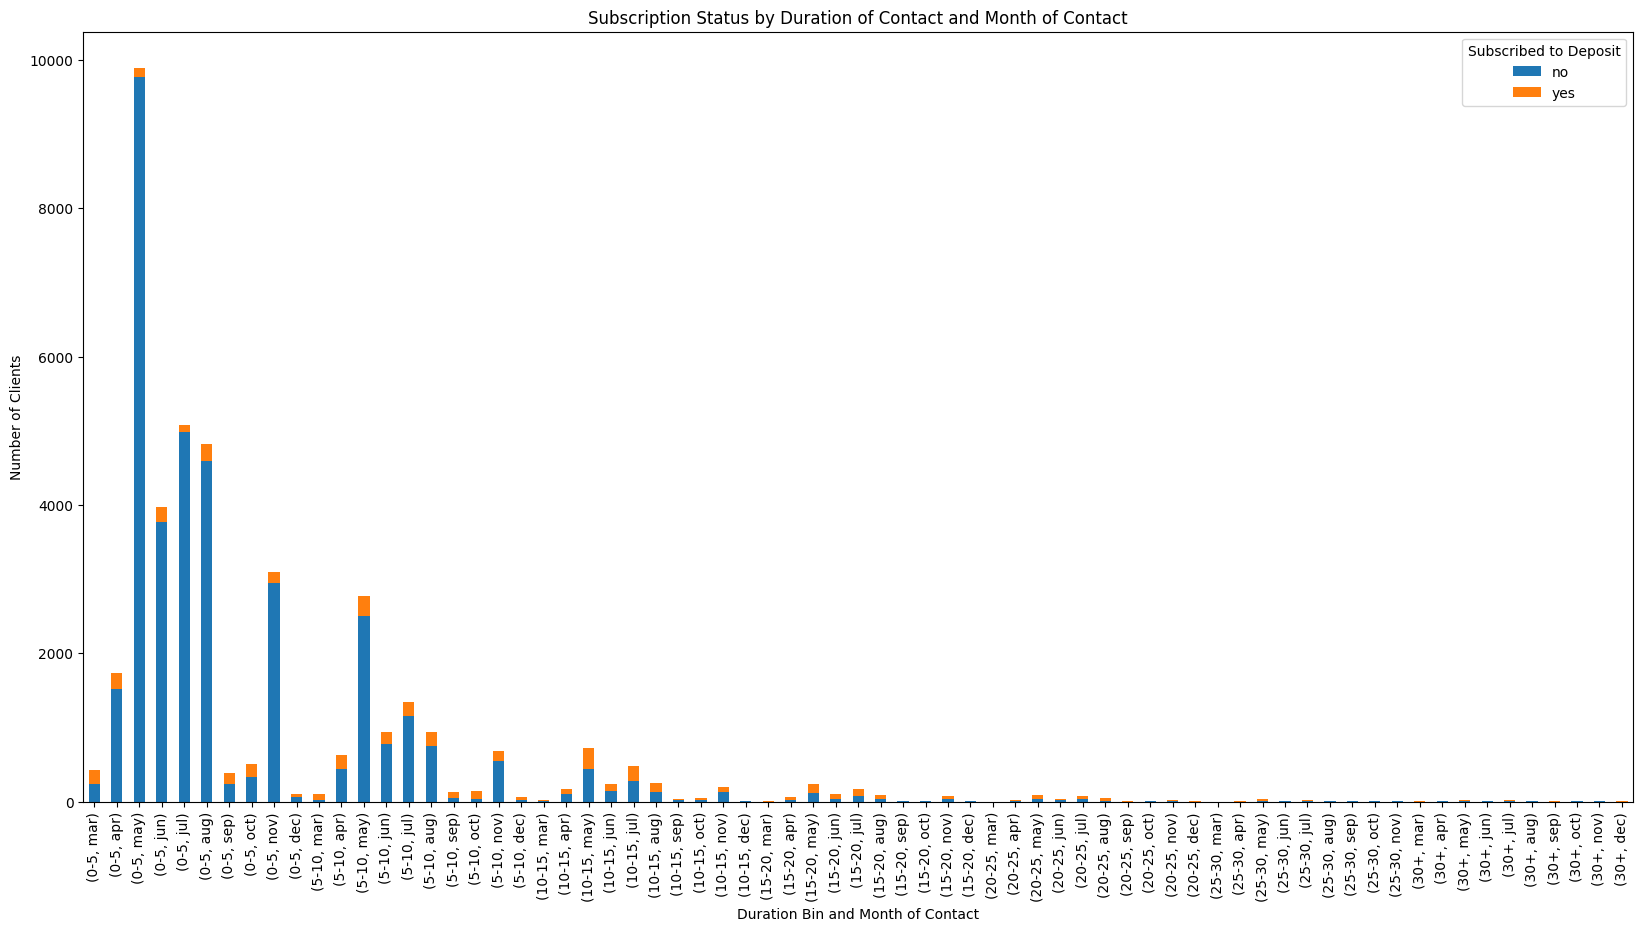

y                     no  yes
duration_bin month           
0-5          mar     234  188
             apr    1519  214
             may    9771  116
             jun    3773  203
             jul    4980   97
...                  ...  ...
30+          aug       8    6
             sep       1    1
             oct       4    1
             nov       3    7
             dec       1    1

[69 rows x 2 columns]

In [20]:
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# Binning the duration for easier analysis
data['duration_min'] = data['duration'] / 60
data['duration_bin'] = pd.cut(data['duration_min'], bins=[0, 5, 10, 15, 20, 25, 30, np.inf],
                              labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+'])

duration_month_vs_target = pd.crosstab(index=[data['duration_bin'], data['month']], columns=data['y'])

duration_month_vs_target_plot = duration_month_vs_target.plot(kind='bar', figsize=(20, 10), stacked=True)
plt.title('Subscription Status by Duration of Contact and Month of Contact')
plt.xlabel('Duration Bin and Month of Contact')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)
plt.legend(title='Subscribed to Deposit')
plt.show()

duration_month_vs_target

Short Calls (0-5 min): Dominated by calls in May with a low success rate; longer calls tend to have higher success rates across all months.

Long Calls (10+ min): Consistently associated with higher subscription rates, indicating that engagement time might be critical for conversion.

May: High volume of calls but lower conversion rates, suggesting potential inefficiency in the campaign during this month.

Sparse Data: Some duration-month combinations have no data, which could indicate rare events or missing data.

Seasonal Trends: Visible trends suggest seasonality, with some months like March and December showing higher conversion rates for longer calls.

# Part 2: Data Preparation (DP)

# 2.1 Fill Missing Values

The mode is the most frequently occurring category in a feature. Using it to fill in missing values introduces the least amount of distortion to the variable's distribution. By using the mode, we maintain the existing relationships between variables since we're using an actual observed value that occurs most often.

In [21]:
categorical_cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Replacing'unknown' with mode
for col in categorical_cols_with_unknown:
    mode = data[col].mode()[0]
    data[col] = data[col].replace('unknown', mode)


missing_values_check = data[categorical_cols_with_unknown].apply(lambda x: (x == 'unknown').sum())
print(missing_values_check)

job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


# 2.2 Deal with Outliers

We will not remove outliers but instead will cap them at a determined minimum and maximum value based on the IQR, which should minimize their influence on the subsequent analysis. IQR is not influenced by extreme values.

In [22]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

data[numerical_cols].describe()

,age,duration,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.0,41188.0
mean,39.939485,234.997317,2.275274,999.0,0.0
std,10.129367,177.353309,1.550510,0.0,0.0
min,17.000000,0.000000,1.000000,999.0,0.0
25%,32.000000,102.000000,1.000000,999.0,0.0
50%,38.000000,180.000000,2.000000,999.0,0.0
75%,47.000000,319.000000,3.000000,999.0,0.0
max,69.500000,644.500000,6.000000,999.0,0.0


# 2.3 Prepare categorical and numerical data

I have used One-Hot Encoding for categorical data to prevent the introduction of a false ordinal relationship between categories, which can mislead many machine learning algorithms.

For numerical data, I have applied Standardization (Z-score normalization) to ensure that each feature has a mean of 0 and a standard deviation of 1, thus giving each feature equal weight. This will help me in 3 part

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [25]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') #avoid dummy variable trap
encoded_categorical_data = onehot_encoder.fit_transform(data[categorical_features])


In [26]:
encoded_categorical_data = onehot_encoder.fit_transform(data[categorical_features])
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()

scaled_numerical_data = scaler.fit_transform(data[numerical_features])

In [29]:
prepared_data = np.hstack((scaled_numerical_data, encoded_categorical_data))
prepared_data

array([[ 1.58555905,  0.14661693, -0.82249682, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.6842831 , -0.48489854, -0.82249682, ...,  0.        ,
         1.        ,  0.        ],
       [-0.29019783, -0.05073165, -0.82249682, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.58555905, -0.2593573 , -0.17754006, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40087049,  1.16719106, -0.82249682, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.91833368,  0.02256925,  0.46741671, ...,  0.        ,
         0.        ,  0.        ]])

# Part 3: DR (25% max)

I want to use PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding), and that's why:

PCA:

PCA aims to maintain as much of the variance in your high-dimensional data as possible and  by focusing on components with the highest variance, PCA can help filter out noise from the data


t-SNE:

t-SNE is particularly good at capturing non-linear relationships between points, which PCA might miss since it is a linear method and t-SNE has hyperparameters like perplexity that can be tuned to potentially reveal different aspects of the data's structure.

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

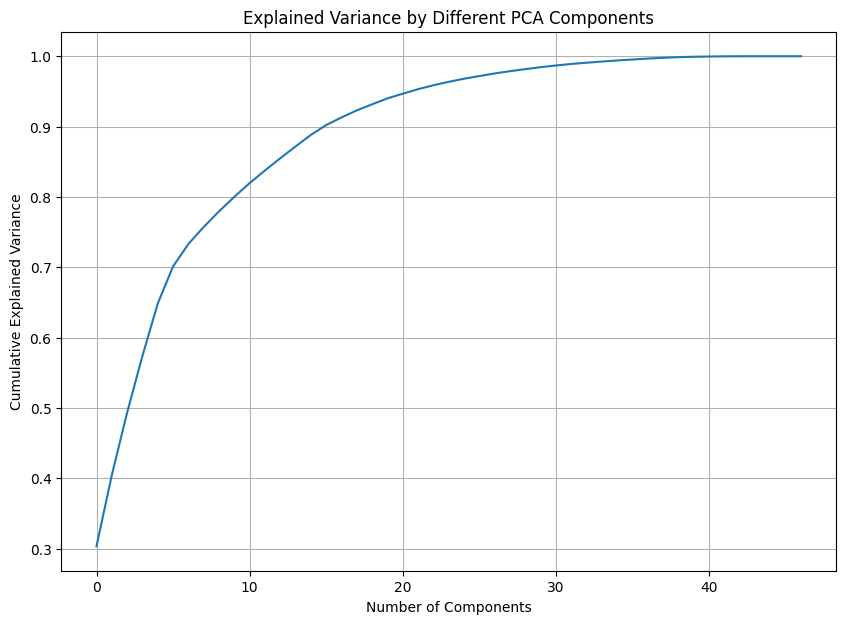

In [37]:
pca = PCA().fit(prepared_data)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different PCA Components')
plt.grid(True)
plt.show()

In [38]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_for_95 = np.argmax(explained_variance_ratio >= 0.95) + 1

In [39]:
pca = PCA(n_components=n_components_for_95)
principal_components = pca.fit_transform(prepared_data)

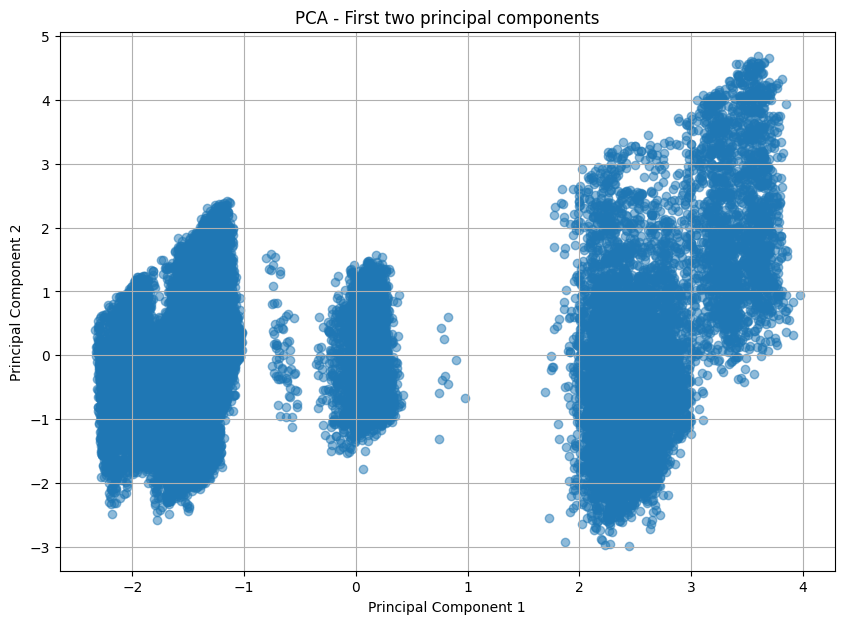

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First two principal components')
plt.grid(True)
plt.show()

In [41]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(principal_components)

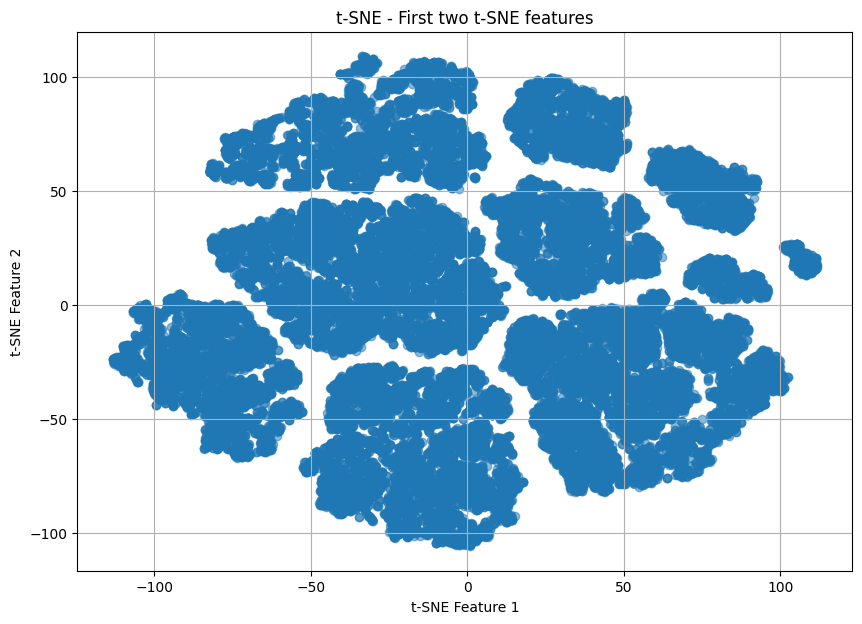

In [42]:
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE - First two t-SNE features')
plt.grid(True)
plt.show()

In [43]:
print(f"Number of PCA components chosen to explain 95% of variance: {n_components_for_95}")
print(f"Explained variance by {n_components_for_95} components: {explained_variance_ratio[n_components_for_95 - 1]:.2f}")

Number of PCA components chosen to explain 95% of variance: 22
Explained variance by 22 components: 0.95


Based on plots of PCA and t-SNE:

1)PCA:The PCA plot shows that 22 components are sufficient to explain 95% of the variance in the dataset. And scatter plots
2)t-SNE: The t-SNE plot revealed clusters within the data that were not in PCA. SO, t-SNE is more effective at modeling the local structure of the data and can uncover patterns that linear methods like PCA might missed. But t-SNE does not preserve global relationships as PCA does.

based on this analysis:
For predictive modeling i would choose to use the 22 PCA components as features since they capture most of the information in the dataset while significantly reducing its dimensionality
For exploratory data analysis, especially to understand data grouping and structure, t-SNE visualizations would be more revealing.

# Conclusion:

 In this assignment, I conducted a thorough exploration of the dataset through univariate and multivariate analyses, revealing key distributions, correlations, and anomalies  I managed to work with missing values with mode imputation, managed outliers with capping based on the IQR, and prepared the data through one-hot encoding and standardization, setting a strong foundation for dimensionality reduction. The use of PCA and t-SNE has provided me with a deeper understanding of the dataset's structure.
 The work was structured methodically, with clear sections, informative visualizations, and detailed explanations for each data processing action. Code reuse was practiced for efficiency, and additional insights were sought beyond the basic requirements, demonstrating a comprehensive approach to the data science workflow.